In [4]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
np.random.seed(42)

vuln_types = (
    ["SQL Injection"] * 18 +
    ["Insecure Deserialization"] * 12 +
    ["Hardcoded Secret"] * 10 +
    ["Unsafe Eval"] * 14 +
    ["No Vulnerability"] * 6
)
np.random.shuffle(vuln_types)
is_vulnerable = [True] * 54 + [False] * 6
np.random.shuffle(is_vulnerable)
annotator_1 = np.random.choice(["vulnerable", "not vulnerable"], size=60, p=[0.7, 0.3])
annotator_2 = np.random.choice(["vulnerable", "not vulnerable"], size=60, p=[0.6, 0.4])
code_lengths = np.random.randint(5, 30, size=60)

data = {
    "code_id": range(1, 61),
    "vulnerability_type": vuln_types,
    "is_vulnerable": is_vulnerable,
    "code_length": code_lengths,
    "annotator_1_label": annotator_1,
    "annotator_2_label": annotator_2
}
df = pd.DataFrame(data)
print("Sample Dataset:")
display(df.head())
df.replace([np.inf, -np.inf], np.nan, inplace=True)

Sample Dataset:


,code_id,vulnerability_type,is_vulnerable,code_length,annotator_1_label,annotator_2_label
0,1,SQL Injection,True,28,vulnerable,not vulnerable
1,2,SQL Injection,True,5,not vulnerable,not vulnerable
2,3,Hardcoded Secret,True,28,vulnerable,vulnerable
3,4,Unsafe Eval,True,24,vulnerable,vulnerable
4,5,SQL Injection,True,15,vulnerable,vulnerable



Summary Statistics:


,code_id,vulnerability_type,is_vulnerable,code_length,annotator_1_label,annotator_2_label
count,60.000000,60,60,60.000000,60,60
unique,NaN,5,2,NaN,2,2
top,NaN,SQL Injection,True,NaN,vulnerable,vulnerable
freq,NaN,18,54,NaN,41,35
mean,30.500000,NaN,NaN,16.400000,NaN,NaN
std,17.464249,NaN,NaN,7.991945,NaN,NaN
min,1.000000,NaN,NaN,5.000000,NaN,NaN
25%,15.750000,NaN,NaN,8.000000,NaN,NaN
50%,30.500000,NaN,NaN,18.000000,NaN,NaN
75%,45.250000,NaN,NaN,23.250000,NaN,NaN


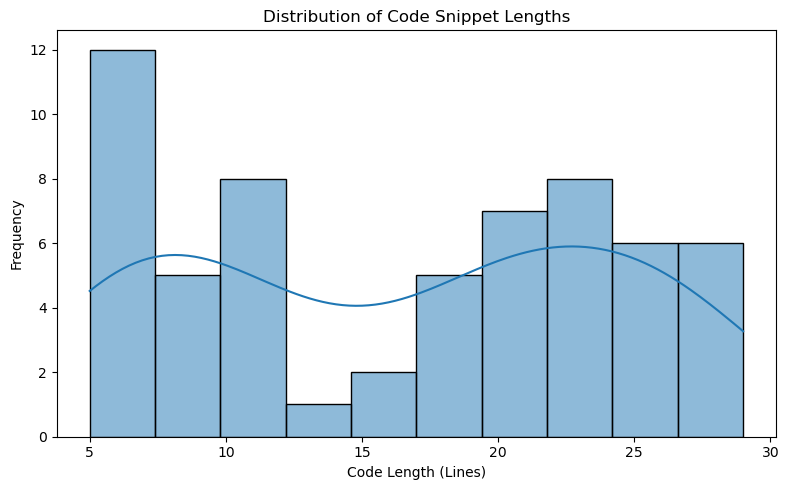

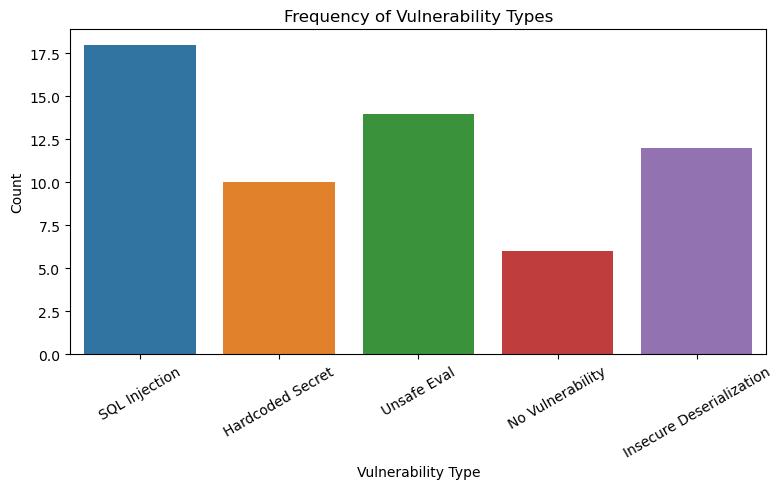

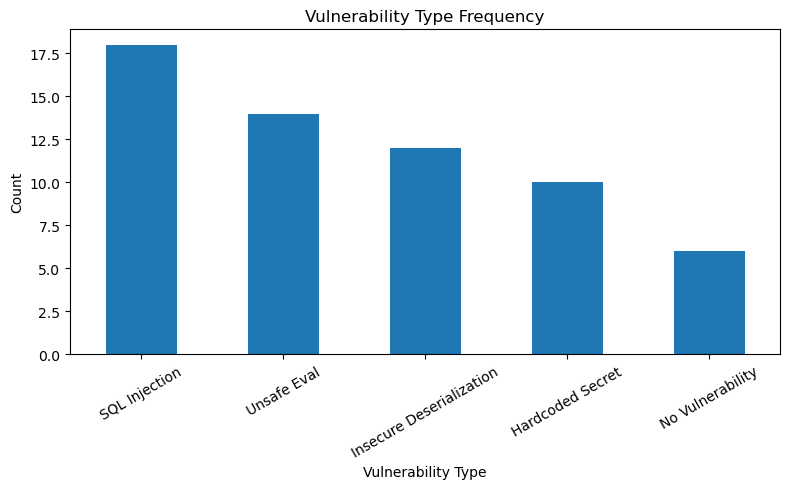

Cohen's Kappa Score for Inter-Annotator Agreement: -0.07


In [6]:
print("\nSummary Statistics:")
display(df.describe(include='all'))

#Code length histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["code_length"], bins=10, kde=True)
plt.title("Distribution of Code Snippet Lengths")
plt.xlabel("Code Length (Lines)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Vulnerability types bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x="vulnerability_type", data=df)
plt.title("Frequency of Vulnerability Types")
plt.xlabel("Vulnerability Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
df["vulnerability_type"].value_counts().plot(kind='bar')
plt.title("Vulnerability Type Frequency")
plt.xlabel("Vulnerability Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#Cohen's Kappa score
kappa = cohen_kappa_score(df["annotator_1_label"], df["annotator_2_label"])
print(f"Cohen's Kappa Score for Inter-Annotator Agreement: {kappa:.2f}")

df.to_csv("codeshield_dataset.csv", index=False)
